#  <font color='#57998f'>Taxi Trajectory Data | Machine Learning Application </font>

Current notebook is part of the final assignment in the context of **'Machine Learning'** course, <br> provided by MSc in Artificial Intelligence from NCSR Demokritos. 

Dataset Reference:  
Taxi Service Trajectory - Prediction Challenge, [ECML PKDD](https://ecmlpkdd.org/) 2015 Data Set <br>

  
<br>

> Chiotis Nikolaos - MTN2221 <br>
> chiotisn@yahoo.com <br>





##  <font color='#37665f'>Preprocessed Dataset Description</font> 

The preprocessed data collected, have the below features:

|  | Feature Name | DataType | Description |
| :-: | :-: | :-: | :- |
| 1 | **TRIP_ID** | String | Contains an unique **id** for each trip |
| 2 | **CALL_TYPE** | String | Identifies the way used to **demand this service**. <br><br> It may contain one of three possible values: <br> **A**: if this trip was dispatched from the central <br> **B**: if this trip was demanded directly to a taxi driver on a specific stand <br> **C**: otherwise (i.e. a trip demanded on a random street) |
| 3 | **ORIGIN_CALL** | Integer | Contains a **customer id** for each phone number which was used to demand, at least, one service. <br> It identifies the trip’s customer if CALL_TYPE=’A’, otherwise, it assumes a NULL value |
| 4 | **ORIGIN_STAND** | Integer |  Contains a **taxi stand id**. <br> It identifies the starting point of the trip if CALL_TYPE=’B’, otherwise, it assumes a NULL value |
| 5 | **TAXI_ID** | Integer | Contains the **taxi driver's id** that performed each trip |
| 6 | **DAYTYPE** | String | Identifies the **daytype of the trip’s start**. <br> It assumes one of three possible values: <br> **B**: if this trip started on a holiday or any other special day (i.e. extending holidays, floating holidays, etc.) <br> **C**: if the trip started on a day before a type-B day <br> **A**: otherwise (i.e. a normal day, workday or weekend)|
| 7 | **TRAVEL_DURATION** | Integer | Taxi **trip duration** in seconds |
| 8 | **FROM_DATE** | Datetime | Trip **starting datetime** |
| 9 | **HOUR** | Datetime |  Trip **starting hour of day**|
| 10 | **DAY_OF_WEEK** | Datetime |  Trip **starting day of week**|
| 11 | **MONTH** | Datetime |  Trip **starting month** |
| 12 | **TO_DATE** | Datetime |  Trip **ending datetime**|
| 13 | **FROM_ROADTYPE** | String | **Road type** of departure point |
| 14 | **FROM_LANES** | Integer/List | **Number of lanes** at departure point |
| 15 | **TO_ROADTYPE** | String | **Road type** of arrival point |
| 16 | **TO_LANES** | Integer/List | **Number of lanes** at arrival point |
| 17 | **MAP_ROUTE_LENGTH** | Float | **Trip length** based on map's shortest route (in meters) |
| 18 | **HIGHWAY** | Float | **Perventage** of map's shortest route that is on **highway**  |
| 19 | **RESIDENTIAL** | Float | **Perventage** of map's shortest route that is on **residential street** |
| 20 | **LIVING_STREET** | Float | **Perventage** of map's shortest route that is on **living street** |
| 21 | **ROUTE_TURNS** | Integer | **Number of turns** of map's shortest route |


<br> <br>

##  <font color='#37665f'>Requirements</font> 

This project developed and executed using **Python 3.9.6.**  in **Jupyter Notebook**.<br><br>
Preprocessed dataset size: **9.5MB** <br><br>
**Libraries** used, can be found at [requirements.txt](https://github.com/chiotisn/MScAI-ML-Assignment-ChiotisN/blob/main/requirements.txt).

In [1]:
import os
import math
import joblib

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import *

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

<br> <br>

##  <font color='#37665f'>Read Dataset</font> 

<font color='#425451'>Checks if dataset is available, if yes, reads it.</font> 

In [2]:
print('Looking for preprocessed dataset..')
if os.path.exists('./preprocessed_data.pkl'):
    print('Reading preprocessed dataset from:\tpreprocessed_data.pkl')
    df = pd.read_pickle('./preprocessed_data.pkl')
    print('We are ready to go!')
else: 
    print('Preprocessed datased not found. Please execute:\t1. Data Preprocessing.ipynb')

Looking for preprocessed dataset..
Reading preprocessed dataset from:	preprocessed_data.pkl
We are ready to go!


<font color='#425451'>Dataset shape</font> 

In [3]:
print('Dataset has {} columns and {} rows.'.format(df.shape[1],df.shape[0]))

Dataset has 21 columns and 68514 rows.


<br> <br>

##  <font color='#37665f'>Data Transformation for ML</font> 

####  <font color='#425451'>Check columns with null values</font> 

FROM_LANES, TO_LANES: Information missing in small uncategorized road, so we fill null with 0 <br>
HIGHWAY, RESIDENTIAL, LIVING_STREET, ROUTE_TURNS: No information found means that these values are 0

In [4]:
df.isna().sum()

TRIP_ID                 0
CALL_TYPE               0
ORIGIN_CALL             0
ORIGIN_STAND            0
TAXI_ID                 0
DAY_TYPE                0
TRAVEL_DURATION         0
FROM_DATE               0
TO_DATE                 0
HOUR                    0
DAY_OF_WEEK             0
MONTH                   0
FROM_ROADTYPE           0
FROM_LANES          32280
TO_ROADTYPE             0
TO_LANES            35575
MAP_ROUTE_LENGTH        0
HIGHWAY               327
RESIDENTIAL           327
LIVING_STREET         327
ROUTE_TURNS             0
dtype: int64

In [5]:
df.fillna(0, inplace=True)

####  <font color='#425451'>Impute String/List variables</font> 

In order to make dataset data types compatible with ML algorithms, we tranform string and list variables

<font color='#425451'>OneHot Encoding for CALL_TYPE</font> 

In [6]:
df['CALL_TYPE'].value_counts(normalize=True)

B    0.515457
C    0.270251
A    0.214292
Name: CALL_TYPE, dtype: float64

In [7]:
df = pd.get_dummies(df, columns=['CALL_TYPE']).rename(columns={'CALL_TYPE_A':'CALL_TYPE_RANDOM',
                                                               'CALL_TYPE_B':'CALL_TYPE_CENTER',
                                                               'CALL_TYPE_C':'CALL_TYPE_STAND'})

<font color='#425451'>Drop DAY_TYPE, because only contains one value</font> 

In [8]:
df['DAY_TYPE'].value_counts(normalize=True)

A    1.0
Name: DAY_TYPE, dtype: float64

In [9]:
df.drop(columns=['DAY_TYPE'], inplace=True)

<font color='#425451'>LabelEncode FROM_ROADTYPE & TO_ROADTYPE, based on the street flow.</font>  <br><br>
0 for living street - 8 for motorway

In [10]:
df['FROM_ROADTYPE'] = df.loc[:,'FROM_ROADTYPE'].apply(lambda x: 1 if x in ['living_street','[residential, living_street]'] else 
                                                                2 if x in ['residential','[residential, tertiary]'] else 
                                                                4 if x in ['tertiary','tertiary_link','[tertiary, tertiary_link]'] else 
                                                                5 if x in ['secondary','secondary_link','[secondary, secondary_link]'] else 
                                                                6 if x in ['primary','primary_link'] else 
                                                                7 if x in ['trunk','trunk_link'] else 
                                                                8 if x in ['motorway','motorway_link'] else 3)  

In [11]:
df['TO_ROADTYPE'] = df.loc[:,'TO_ROADTYPE'].apply(lambda x: 1 if x in ['living_street','[residential, living_street]'] else 
                                                                2 if x in ['residential','[residential, tertiary]'] else 
                                                                4 if x in ['tertiary','tertiary_link','[tertiary, tertiary_link]'] else 
                                                                5 if x in ['secondary','secondary_link','[secondary, secondary_link]'] else 
                                                                6 if x in ['primary','primary_link'] else 
                                                                7 if x in ['trunk','trunk_link'] else 
                                                                8 if x in ['motorway','motorway_link'] else 3)  

<font color='#425451'>Clean FROM_LANES & TO_LANES, bacause some records have lists instead of integer values.</font>  

In [12]:
df['FROM_LANES'].value_counts()

0            32280
2            17915
3            11983
1             2692
[2, 3]        1440
[4, 3]         758
4              709
[1, 2, 3]      418
5              141
[1, 2]         101
[1, 3]          55
[5, 4]          13
[4, 5]           4
[2, 4]           4
[4, 2]           1
Name: FROM_LANES, dtype: int64

In [13]:
df['FROM_LANES'] = df['FROM_LANES'].astype(str) \
                                   .str.replace('[','',regex=False) \
                                   .str.replace(']','',regex=False) \
                                   .str.replace('\'','',regex=False) \
                                   .str.replace(' ','',regex=False) \
                                   .str.split(',') \
                                   .apply(lambda x: int(max(x)))

df['TO_LANES'] = df['TO_LANES'].astype(str) \
                               .str.replace('[','',regex=False) \
                               .str.replace(']','',regex=False) \
                               .str.replace('\'','',regex=False) \
                               .str.replace(' ','',regex=False) \
                               .str.split(',') \
                               .apply(lambda x: int(max(x)))

In [14]:
df['FROM_LANES'].value_counts()

0    32280
2    18016
3    13896
1     2692
4     1472
5      158
Name: FROM_LANES, dtype: int64

####  <font color='#425451'>Drop columns that are not needed</font> 

In [15]:
df.drop(columns=['TRIP_ID', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID', 'FROM_DATE', 'TO_DATE'], inplace=True)

####  <font color='#425451'>Check correlations between variables</font> 

In [16]:
cor_matrix = df.corr(method='pearson').abs()
cor_matrix = pd.melt(cor_matrix.reset_index(), id_vars='index', value_vars=cor_matrix.columns)

In [17]:
cor_matrix[(cor_matrix['index']!=cor_matrix['variable']) & (cor_matrix['value']>0.95)]

,index,variable,value


No correlated features found

<br> <br>

##  <font color='#37665f'>Travel Duration Prediction | Regression Task</font> 

####  <font color='#425451'>Train - Test Data Split</font> 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TRAVEL_DURATION', axis=1), 
                                                    df['TRAVEL_DURATION'], 
                                                    test_size = 0.2, 
                                                    random_state=32)

In [19]:
X_train.shape

(54811, 15)

In [20]:
X_test.shape

(13703, 15)

####  <font color='#425451'>Scale Data</font> 

In [21]:
x_scaler = StandardScaler()

X_train_s = x_scaler.fit_transform(X_train)
X_test_s = x_scaler.transform(X_test)  

# save scaler to use when scoring new data
joblib.dump(x_scaler, './models/x_scaler_travel_duration.pkl')

['./models/x_scaler_travel_duration.pkl']

####  <font color='#425451'>KNeighbors Regressor</font> 

Apply KNeighbors Regressos using GridSearchCV, test **n_neighbors** parameter and report results for MSE & RMSE. 

In [23]:
knr = KNeighborsRegressor(algorithm='kd_tree',
                          n_jobs=-1)

parameters = {'n_neighbors':[10, 15]}

scorers = {'mean_squared_error':'neg_mean_squared_error',
           'root_mean_squared_error':'neg_root_mean_squared_error',
           'mean_absolute_percentage_error':'neg_mean_absolute_percentage_error',}

grid_search_knr = GridSearchCV(estimator = knr,
                               param_grid = parameters,
                               scoring = scorers,
                               n_jobs = -1,
                               cv = 5,
                               refit=False)

grid_search_knr.fit(X_train_s, y_train)

grid_search_knr_results = pd.DataFrame(grid_search_knr.cv_results_)

grid_search_knr_results[['params','mean_fit_time','mean_test_mean_squared_error',
                         'mean_test_root_mean_squared_error']]

,params,mean_fit_time,mean_test_mean_squared_error,mean_test_root_mean_squared_error
0,{'n_neighbors': 10},0.439425,-173556.354823,-416.209075
1,{'n_neighbors': 15},0.476127,-168829.740869,-410.442095


In [25]:
# convert mean_test_root_mean_squared_error to minutes for easier interpretation
grid_search_knr_results['mean_test_root_mean_squared_error']/60

0   -6.936818
1   -6.840702
Name: mean_test_root_mean_squared_error, dtype: float64

<font color='#425451'>Fit best KNeighbors Regressor</font>  

In [49]:
knr = KNeighborsRegressor(n_neighbors=15,
                          algorithm='kd_tree',
                          n_jobs=-1)

knr.fit(X_train_s, y_train)
y_pred = knr.predict(X_test_s)

<font color='#425451'>Performance on Test</font>  

In [50]:
print('Test mean rooted square error: ')
math.sqrt(mean_squared_error(y_test,y_pred))

Test mean rooted square error: 


432.89298023412766

In [51]:
print('Test mean rooted square error in minutes: ')
math.sqrt(mean_squared_error(y_test,y_pred))/60

Test mean rooted square error in minutes: 


7.214883003902128

####  <font color='#425451'>Random Forest Regressor</font> 

In [36]:
rfr = RandomForestRegressor(criterion='squared_error',
                            min_samples_leaf=5,
                            min_samples_split=10)

parameters = {'n_estimators':[200, 500, 1000],
              'max_depth':[3,5]}

scorers = {'mean_squared_error':'neg_mean_squared_error',
           'root_mean_squared_error':'neg_root_mean_squared_error',
           'mean_absolute_percentage_error':'neg_mean_absolute_percentage_error',}

grid_search_rfr = GridSearchCV(estimator = rfr,
                               param_grid = parameters,
                               scoring = scorers,
                               n_jobs = -1,
                               cv = 5,
                               refit=False)

grid_search_rfr.fit(X_train, y_train)

grid_search_rfr_results = pd.DataFrame(grid_search_rfr.cv_results_)

grid_search_rfr_results[['params','mean_fit_time','mean_test_mean_squared_error',
                         'mean_test_root_mean_squared_error']]

,params,mean_fit_time,mean_test_mean_squared_error,mean_test_root_mean_squared_error
0,"{'max_depth': 3, 'n_estimators': 200}",40.303082,-170791.925418,-412.870557
1,"{'max_depth': 3, 'n_estimators': 500}",104.719531,-170795.712832,-412.871205
2,"{'max_depth': 3, 'n_estimators': 1000}",218.654222,-170750.694215,-412.819520
3,"{'max_depth': 5, 'n_estimators': 200}",71.052374,-164360.626266,-404.925211
4,"{'max_depth': 5, 'n_estimators': 500}",175.481057,-164311.211559,-404.860301
5,"{'max_depth': 5, 'n_estimators': 1000}",301.474276,-164223.016271,-404.757099


<font color='#425451'>Fit best Random Forest Regressor</font>  

In [43]:
rfr = RandomForestRegressor(n_estimators=1000,
                            criterion='squared_error',
                            max_depth=5,
                            min_samples_leaf=5,
                            min_samples_split=10)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

<font color='#425451'>Most important features</font>  

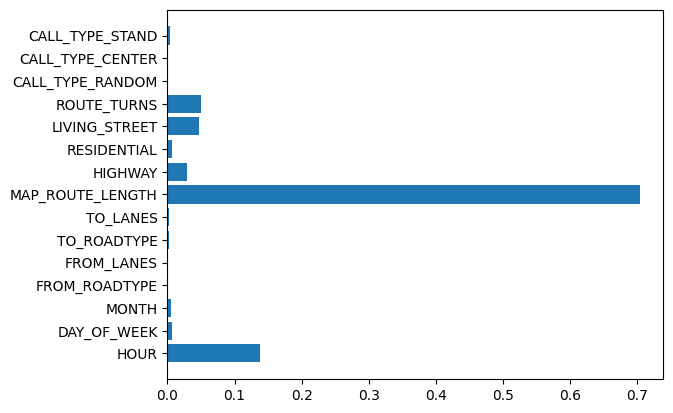

In [44]:
_ = plt.barh(df.drop('TRAVEL_DURATION',axis=1).columns, rfr.feature_importances_)

<font color='#425451'>Performance on Test</font>  

In [47]:
print('Test mean rooted square error: ')
math.sqrt(mean_squared_error(y_test,y_pred))

Test mean rooted square error: 


424.9487930266899

In [48]:
print('Test mean rooted square error in minutes: ')
math.sqrt(mean_squared_error(y_test,y_pred))/60

Test mean rooted square error in minutes: 


7.082479883778165

####  <font color='#425451'>About overfitting</font> 

We can see that both algorithms, are giving slightly worse results in test, compared with the results of cross-validation.  <br>
Also, we can see that for both algorithms, we are using the most 'exploiting' parameters, so maybe we have overfitted our model. <br>
For this reason, we are going to check other parameters, to see if the results of the validation are closer to test.

In [52]:
knr1 = KNeighborsRegressor(n_neighbors=10,algorithm='kd_tree',n_jobs=-1)
knr1.fit(X_train_s, y_train)
y_pred = knr.predict(X_test_s)

print('Test mean rooted square error in minutes: ')
math.sqrt(mean_squared_error(y_test,y_pred))/60

Test mean rooted square error in minutes: 


7.214883003902128

In [59]:
rfr1 = RandomForestRegressor(n_estimators=500,criterion='squared_error',max_depth=3,min_samples_leaf=5,min_samples_split=10)
rfr1.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print('Test mean rooted square error in minutes: ')
error = math.sqrt(mean_squared_error(y_test,y_pred))/60
error

Test mean rooted square error in minutes: 


7.082479883778165

We can see that both algorithms, give the same performance on test with less exploiting parameters, so we the differenct between cross-validation and test performance is not a result of hypeparapeter tuning. <br>
Also, since the test results are the same, with less computational cost & time, we can keep our last regrassion models.

####  <font color='#425451'>Results interpretation</font> 

Our best perfomed regressor has a RMSE of 7 minutes in test data. We should now examine how good or bad this results is. <br>
Starting by examining the actual mean value, we can see that our model does not perform well in general. 

In [60]:
print('The average time of a trip is {:.2f} minutes, while the error in our regressor is {:.2f} minutes '.format(y_test.mean()/60,error))

The average time of a trip is 10.36 minutes, while the error in our regressor is 7.08 minutes 


In [62]:
mean_squared_error([1],[2])

1.0

This is a very inaccurate result in the general test dataset, however we need to investigate how different values of the dependent variable are performing. 

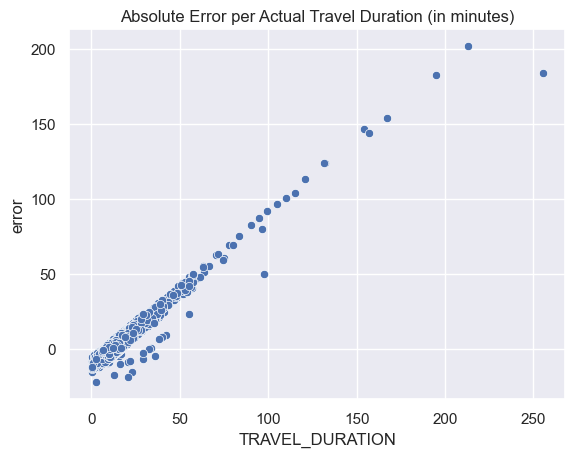

In [88]:
results = y_test.to_frame().reset_index(drop=True).join(pd.Series(y_pred, name='PRED'))
results['error'] = results['TRAVEL_DURATION'] - results['PRED']
results[['TRAVEL_DURATION','error']] = results[['TRAVEL_DURATION','error']]/60
sns.set_theme()
sns.scatterplot(data=results, x="TRAVEL_DURATION", y="error")
plt.title('Absolute Error per Actual Travel Duration (in minutes)')
plt.show()

From the above diagram lead in two conclusions: 
- We observe bigger errors for bigger travel durations
- Test data (and probably train data) have a lot of values close to 0, which may be inaccurate data from false trajectories. For example, there are a lot of taxi trips with travel duration less than 1 minute

In [99]:
print(str((y_test < 60).sum()) + ' trips with less than 1 minute duration in test data')

158 trips with less than 1 minute duration in test data


In [106]:
print(str((y_train < 60).sum()) + ' trips with less than 1 minute duration in train data')

579 trips with less than 1 minute duration in train data


<br> <br>

##  <font color='#37665f'>Travel Value Classification | Classification Task</font> 

Taxi cost meter system depends on the time that the taxi is occupied and the distance of the trip. <br>
We are going to create a metric to annotate high value taxi trips. <br>
The scope is to create a high value class and create a classifier that predicts is a trip is high value or not based on the information of the starting point. <br>
This way, taxi divers will be able have a prediction of the trip and decide if they will take the trip or not. 

In [107]:
# normalize columns so they can be comparable when combined
df['TRAVEL_DURATION'] = (df['TRAVEL_DURATION'] - df['TRAVEL_DURATION'].min()) / (df['TRAVEL_DURATION'].max() - df['TRAVEL_DURATION'].min())    
df['MAP_ROUTE_LENGTH'] = (df['MAP_ROUTE_LENGTH'] - df['MAP_ROUTE_LENGTH'].min()) / (df['MAP_ROUTE_LENGTH'].max() - df['MAP_ROUTE_LENGTH'].min())    

df['VALUE_FACTOR'] = df['TRAVEL_DURATION']*df['MAP_ROUTE_LENGTH']

In [108]:
thres = df['VALUE_FACTOR'].quantile(0.75)
df['HIGH_VALUE'] = df['VALUE_FACTOR'].apply(lambda x: 1 if x>=thres else 0)

In [109]:
df['HIGH_VALUE'].value_counts()

0    51385
1    17129
Name: HIGH_VALUE, dtype: int64

In [110]:
df.drop(['TRAVEL_DURATION','VALUE_FACTOR'], axis=1, inplace=True)

####  <font color='#425451'>Train - Test Data Split</font> 

In [111]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('HIGH_VALUE', axis=1), 
                                                    df['HIGH_VALUE'], 
                                                    test_size = 0.2, 
                                                    random_state=32)

In [112]:
X_train.shape

(54811, 15)

In [113]:
X_test.shape

(13703, 15)

####  <font color='#425451'>Scale Data</font> 

We are going to use Tree-based algorithms, so there is no need for scaling

####  <font color='#425451'>Evaluation Function</font> 

In [152]:
def evalBinaryClassifier(model, x, y, labels=['Positives','Negatives'], thres=0.5):
    
    # evaluation on test set
    pred_test = (model.predict_proba(X_test)[:,1] >= thres)
    score_test = f1_score(y_test, pred_test,average='micro')
    print(classification_report(y_test, pred_test))
    
    # predict probabilities of positive class
    p = model.predict_proba(x)
    if len(model.classes_)!=2:
        raise ValueError('A binary class problem is required')
    if model.classes_[1] == 1:
        pos_p = p[:,1]
    elif model.classes_[0] == 1:
        pos_p = p[:,0]
    
    plt.figure(figsize=[13,8])
    
    #1 -- Confusion matrix
    cm = confusion_matrix(y,model.predict_proba(x)[:,1] >= thres)
    plt.subplot(221)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 14}, fmt='g')
    cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
    for i,t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix', size=15)
    plt.xlabel('Predicted Values', size=13)
    plt.ylabel('True Values', size=13)
      
    #2 -- Distributions of Predicted Probabilities of both classes
    df = pd.DataFrame({'probPos':pos_p, 'target': y})
    plt.subplot(222)
    plt.hist(df[df.target==1].probPos, density=True, bins=25,
             alpha=.5, color='green',  label=labels[0])
    plt.hist(df[df.target==0].probPos, density=True, bins=25,
             alpha=.5, color='red', label=labels[1])
    plt.axvline(thres, color='blue', linestyle='--', label='Boundary')
    plt.xlim([0,1])
    plt.title('Distributions of Predictions', size=15)
    plt.xlabel('Positive Probability (predicted)', size=13)
    plt.ylabel('Samples (normalized scale)', size=13)
    plt.legend(loc="upper right")
    
    #3 -- ROC curve with annotated decision point
    fp_rates, tp_rates, _ = roc_curve(y,p[:,1])
    roc_auc = auc(fp_rates, tp_rates)
    plt.subplot(223)
    plt.plot(fp_rates, tp_rates, color='green',
             lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color='grey')
    #plot current decision point:
    tn, fp, fn, tp = [i for i in cm.ravel()]
    plt.plot(fp/(fp+tn), tp/(tp+fn), 'bo', markersize=8, label='Decision Point')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)
    plt.title('ROC Curve', size=15)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace=.3,hspace=0.5)
    
    #4 -- Precision - Recall curve
    ax4 = plt.subplot(224)
    d = PrecisionRecallDisplay.from_predictions(y, p[:,1], name="LinearSVC",ax=ax4)
    ax4.set_title('Precision - Recall Curve', size=15)

####  <font color='#425451'>AdaBoost Classifier</font> 

In [161]:
ada = AdaBoostClassifier(random_state=42)

grid_search_ada = GridSearchCV(estimator = ada,
                               param_grid = {'n_estimators':[100, 200, 500]},
                               scoring = 'f1',
                               n_jobs = -1, cv = 5,refit=False)

grid_search_ada.fit(X_train, y_train)

pd.DataFrame(grid_search_ada.cv_results_)[['params','mean_fit_time','mean_test_score']]

,params,mean_fit_time,mean_test_score
0,{'n_estimators': 100},8.499960,0.814379
1,{'n_estimators': 200},16.553444,0.816084
2,{'n_estimators': 500},33.342565,0.816723


<font color='#425451'>Fit best AdaBoost Classifier</font>  

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10271
           1       0.85      0.79      0.82      3432

    accuracy                           0.91     13703
   macro avg       0.89      0.87      0.88     13703
weighted avg       0.91      0.91      0.91     13703



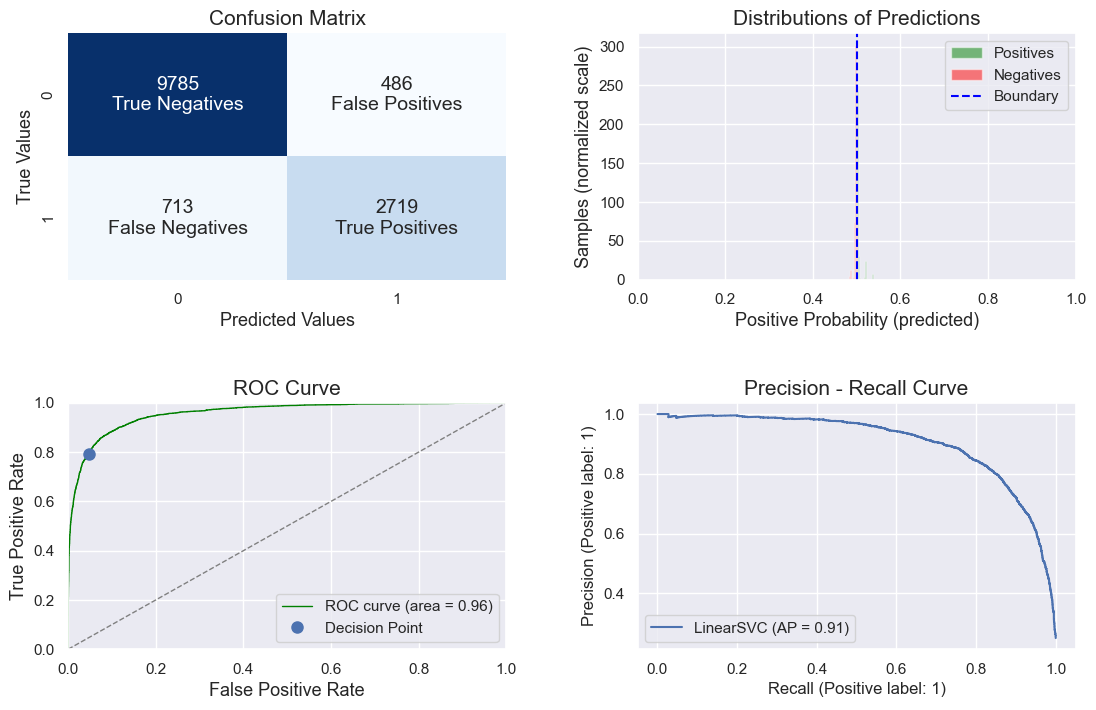

In [162]:
ada_clf = AdaBoostClassifier(n_estimators=500, random_state=42)

ada_clf.fit(X_train, y_train)

evalBinaryClassifier(ada_clf, X_test, y_test)

<font color='#425451'>Feature Importance</font>  

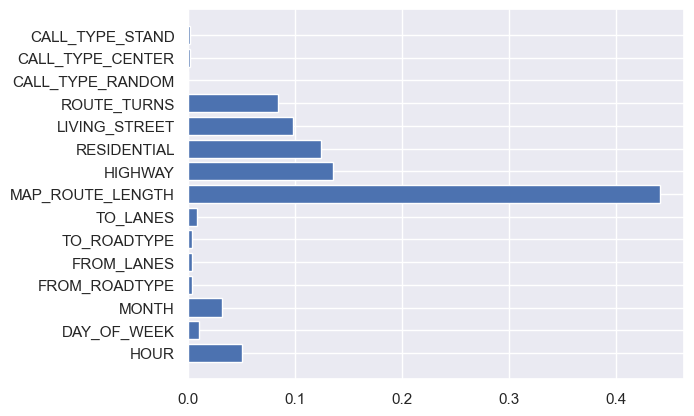

In [163]:
_ = plt.barh(df.drop('HIGH_VALUE',axis=1).columns, ada_clf.feature_importances_)

####  <font color='#425451'>Histogram-based Gradient Boosting Classifier</font> 

In [165]:
hgb = HistGradientBoostingClassifier(random_state=42)

grid_search_hgb = GridSearchCV(estimator = hgb,
                               param_grid = {'learning_rate':[0.01, 0.05, 0.1], 'max_depth':[5, 7]},
                               scoring = 'f1',
                               n_jobs = -1, cv = 5,refit=False)

grid_search_hgb.fit(X_train, y_train)

pd.DataFrame(grid_search_hgb.cv_results_)[['params','mean_fit_time','mean_test_score']]

,params,mean_fit_time,mean_test_score
0,"{'learning_rate': 0.01, 'max_depth': 5}",2.133540,0.786539
1,"{'learning_rate': 0.01, 'max_depth': 7}",2.567864,0.789429
2,"{'learning_rate': 0.05, 'max_depth': 5}",2.121307,0.820783
3,"{'learning_rate': 0.05, 'max_depth': 7}",2.391803,0.822830
4,"{'learning_rate': 0.1, 'max_depth': 5}",1.844048,0.823550
5,"{'learning_rate': 0.1, 'max_depth': 7}",1.408860,0.823314


<font color='#425451'>Fit best HistGradientBoosting Classifier</font>  

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10271
           1       0.86      0.81      0.83      3432

    accuracy                           0.92     13703
   macro avg       0.90      0.88      0.89     13703
weighted avg       0.92      0.92      0.92     13703



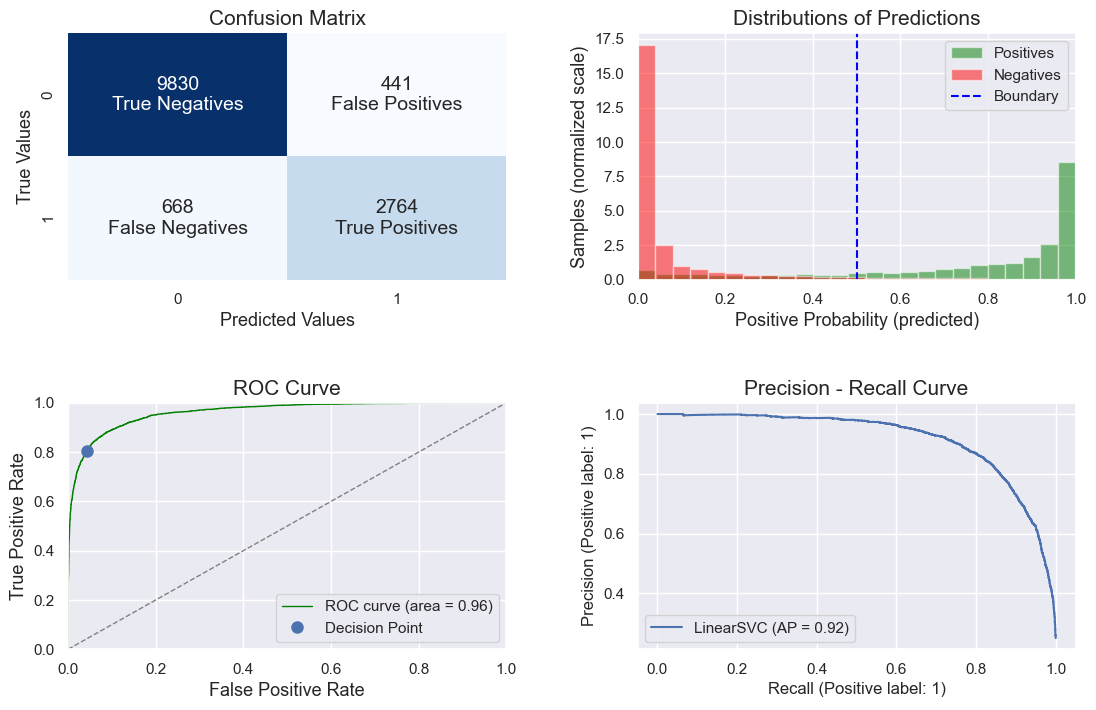

In [166]:
hgb = HistGradientBoostingClassifier(learning_rate=0.1, 
                                     max_depth=5,
                                     random_state=42)

hgb.fit(X_train, y_train)

evalBinaryClassifier(hgb, X_test, y_test)

<font color='#425451'>Evaluation with different decision point at 0.3</font>  

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     10271
           1       0.77      0.88      0.82      3432

    accuracy                           0.90     13703
   macro avg       0.86      0.90      0.88     13703
weighted avg       0.91      0.90      0.91     13703



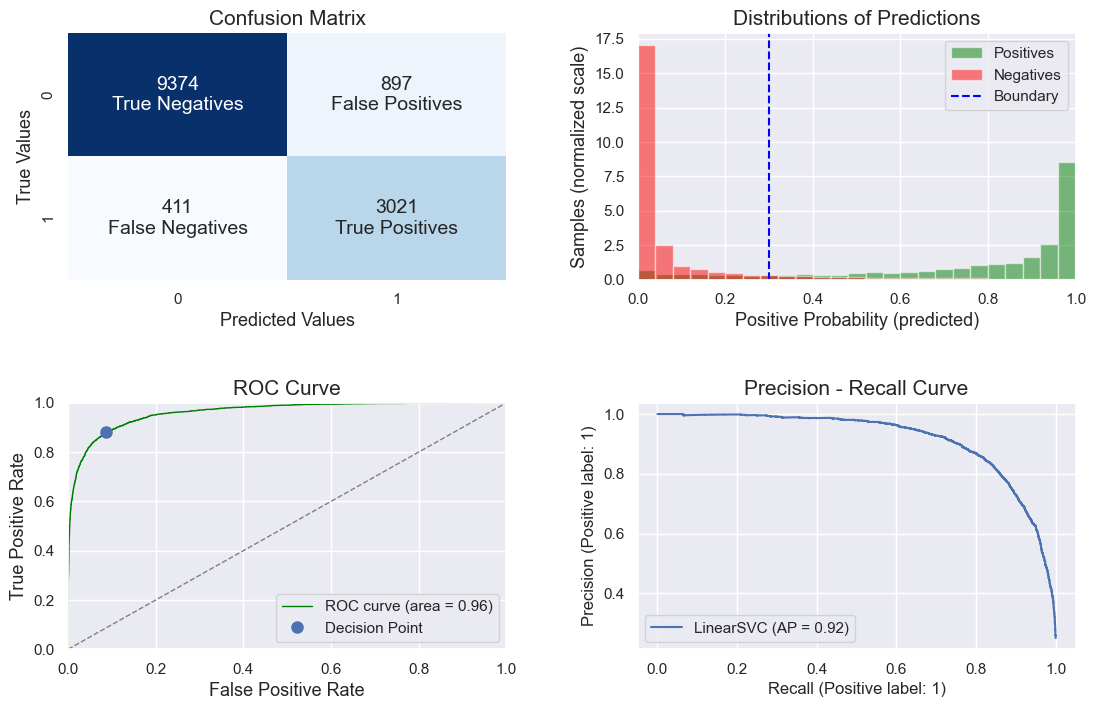

In [167]:
evalBinaryClassifier(hgb, X_test, y_test, thres=0.30)

####  <font color='#425451'>Voting Classifier</font> 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10271
           1       0.86      0.81      0.83      3432

    accuracy                           0.92     13703
   macro avg       0.90      0.88      0.89     13703
weighted avg       0.92      0.92      0.92     13703



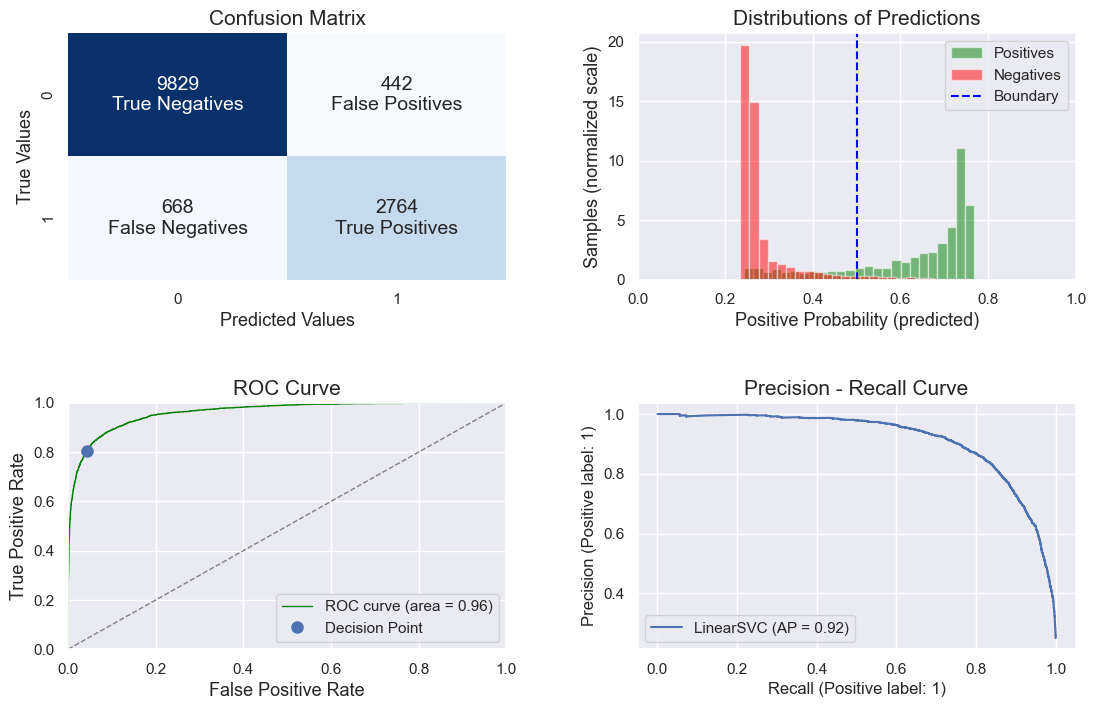

In [168]:
clf = VotingClassifier(estimators=[('ada_clf', ada_clf),('hgb', hgb)], voting='soft')
clf.fit(X_train, y_train)
evalBinaryClassifier(clf,X_test,y_test)

####  <font color='#425451'>Summary</font> 

All selected classifiers had almost the same metrics. However, I think that the best was HistGradientBoostingClassifier, because of the way it distibuted the probabilities, as shown in the second plot of the evaluation. This way, we can select easily another threshold for our classification, in case we want to have results with higher precision or recall.